In [2]:
!pip install nltk
!pip install inflect

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
df = pd.read_csv('reviews_Baby_5_final_dataset.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.0,1.0,1
1,A3O4ATU0ENBKTU,097293751X,MAPN,"[1, 1]",1,1,I use this so that our babysitter (grandma) ca...,5,Compact and Easy way to record the milestones,1361836800,"02 26, 2013",0,0,734,148,0,4.0,1.0,1
2,A2SYNL4YX73KNY,097293751X,"R. Davidson ""Jrdpa""","[2, 2]",2,2,"I like this log, but think it would work bette...",3,Needs clearer AM & PM,1369008000,"05 20, 2013",0,0,288,59,2,4.0,1.0,1
3,A2Q2A6JKY95RTP,097293751X,R. Garrelts,"[2, 2]",2,2,My wife and I have a six month old baby boy an...,3,Expensive and Somewhat Limited Format,1381968000,"10 17, 2013",0,0,2959,505,9,4.0,1.0,1
4,A21I33AWNOWMK8,9729375011,EmilyS,"[1, 2]",1,2,I have used this book since my son was born. ...,5,Great product!,1364256000,"03 26, 2013",0,0,595,117,0,4.5,0.5,0


In [14]:
df.shape

(56950, 19)

In [15]:
df = df[['reviewText']]
df.head()

,reviewText
0,This book is perfect! I'm a first time new mo...
1,I use this so that our babysitter (grandma) ca...
2,"I like this log, but think it would work bette..."
3,My wife and I have a six month old baby boy an...
4,I have used this book since my son was born. ...


In [16]:
df = df[:6]

In [17]:
df.shape

(6, 1)

# Tokenization

In [20]:
docs = list(df['reviewText'])

In [21]:
docs[0]

"This book is perfect!  I'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  Definitely would recommend this for new moms.  Plus it's small enough that I throw in the diaper back for doctor visits."

In [22]:
doc_word_tokens = []

for doc in docs:
    tokenize_word = word_tokenize(doc)
    
    doc_word_tokens.append(tokenize_word)

In [24]:
print(doc_word_tokens[0])

['This', 'book', 'is', 'perfect', '!', 'I', "'m", 'a', 'first', 'time', 'new', 'mom', ',', 'and', 'this', 'book', 'made', 'it', 'so', 'easy', 'to', 'keep', 'track', 'of', 'feedings', ',', 'diaper', 'changes', ',', 'sleep', '.', 'Definitely', 'would', 'recommend', 'this', 'for', 'new', 'moms', '.', 'Plus', 'it', "'s", 'small', 'enough', 'that', 'I', 'throw', 'in', 'the', 'diaper', 'back', 'for', 'doctor', 'visits', '.']


In [25]:
from nltk.probability import FreqDist
fdist = FreqDist(doc_word_tokens[0])

In [27]:
fdist.most_common(15)

[(',', 3),
 ('.', 3),
 ('book', 2),
 ('I', 2),
 ('new', 2),
 ('this', 2),
 ('it', 2),
 ('diaper', 2),
 ('for', 2),
 ('This', 1),
 ('is', 1),
 ('perfect', 1),
 ('!', 1),
 ("'m", 1),
 ('a', 1)]

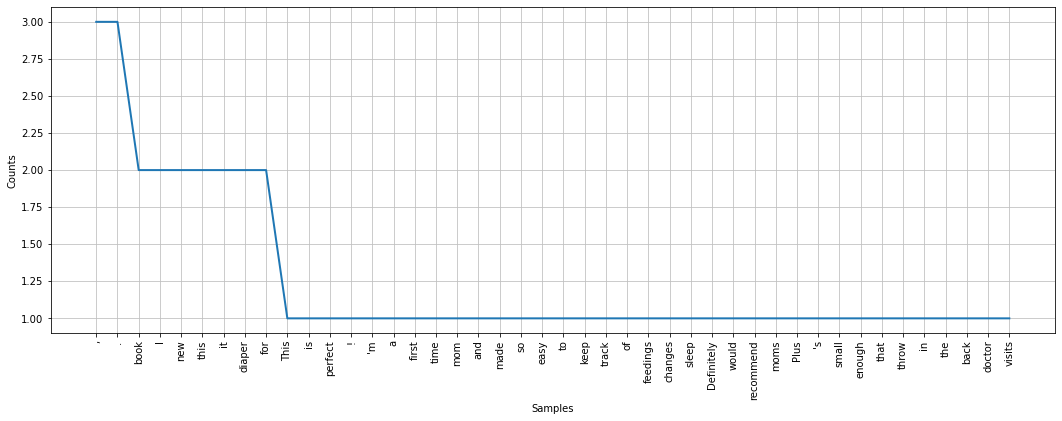

In [29]:
# Viualize it
plt.figure(figsize=(18, 6))
fdist.plot(cumulative= False)
plt.show()

# Normalization

In [45]:
import re, string, unicodedata

import inflect 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [31]:
# Lower case
def to_lowercase(docs):
    docs_list= []
    
    for doc in docs:
        new_word = doc.lower()
        docs_list.append(new_word)
        
    return docs_list

In [32]:
# Remove punctuations
def remove_puncs(docs):
    docs_list = []
    for doc in docs:
        new_word = re.sub('[^\w\s]', '', doc)
        
        if new_word != '':
            docs_list.append(new_word)
    return docs_list

In [33]:
# Replace numbers
def replace_numbers(docs):
    docs_list= []
    inf_engine = inflect.engine()
    
    for doc in docs:
        
        final_word_list= []
        words = doc.split()
        
        for word in words:
            if word.isdigit():
                final_word_list.append(inf_engine.number_to_words(word))
            else:
                final_word_list.append(word)
        docs_list.append(" ".join(final_word_list))
    return docs_list

In [36]:
# Lematize words
def lemmatize_verbs(docs):
    lemmatizer = WordNetLemmatizer()
    docs_list = []
    
    for doc in docs:
        
        final_word_list = []
        words = doc.split()
        
        for word in words:
            final_word_list.append(lemmatizer.lemmatize(word, pos= 'v'))
        docs_list.append(" ".join(final_word_list))
        
    return docs_list

In [37]:
# All helper methods
def normalization(docs):
    docs = to_lowercase(docs)
    docs = remove_puncs(docs)
    docs = replace_numbers(docs)
    docs = lemmatize_verbs(docs)
    return docs

In [40]:
docs[0]

"This book is perfect!  I'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  Definitely would recommend this for new moms.  Plus it's small enough that I throw in the diaper back for doctor visits."

In [42]:
lowercase_docs = to_lowercase(docs)
lowercase_docs[0]

"this book is perfect!  i'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  definitely would recommend this for new moms.  plus it's small enough that i throw in the diaper back for doctor visits."

In [47]:
remove_punc_docs = remove_puncs(lowercase_docs)
remove_punc_docs[2]

'i like this log but think it would work better with clearer am  pm sections each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the 2 blank spaces above 7am right now'

In [48]:
nums_replace_docs = replace_numbers(remove_punc_docs)
nums_replace_docs[2]

'i like this log but think it would work better with clearer am pm sections each page is twelve hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the two blank spaces above 7am right now'

In [50]:
# Try lemmatization
doc_to_lemmatize = ['These pretzels are making me thirsty',
                   'Sometimes the road less traveled is less traveled for a reason.']
lemmatize_verbs(doc_to_lemmatize)

['These pretzels be make me thirsty',
 'Sometimes the road less travel be less travel for a reason.']

# Create Feature Vectors From Text

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(docs)

CountVectorizer()

In [52]:
count_vectorizer.vocabulary_

{'this': 336,
 'book': 42,
 'is': 174,
 'perfect': 258,
 'first': 119,
 'time': 340,
 'new': 227,
 'mom': 211,
 'and': 18,
 'made': 199,
 'it': 175,
 'so': 307,
 'easy': 97,
 'to': 343,
 'keep': 178,
 'track': 346,
 'of': 235,
 'feedings': 113,
 'diaper': 83,
 'changes': 55,
 'sleep': 305,
 'definitely': 80,
 'would': 384,
 'recommend': 280,
 'for': 121,
 'moms': 213,
 'plus': 264,
 'small': 306,
 'enough': 102,
 'that': 327,
 'throw': 338,
 'in': 167,
 'the': 328,
 'back': 29,
 'doctor': 88,
 'visits': 361,
 'use': 355,
 'our': 248,
 'babysitter': 28,
 'grandma': 137,
 'can': 50,
 'what': 372,
 'goes': 134,
 'on': 239,
 'during': 92,
 'day': 78,
 'we': 366,
 've': 359,
 'recorded': 281,
 'many': 203,
 'milestones': 210,
 'since': 302,
 'received': 279,
 'month': 214,
 'diary': 84,
 'has': 146,
 'room': 286,
 'notes': 233,
 'wish': 378,
 'hours': 158,
 'started': 317,
 'around': 22,
 'am': 16,
 'went': 369,
 'until': 353,
 'pm': 265,
 'but': 47,
 'just': 177,
 'write': 385,
 'over': 25

In [53]:
len(count_vectorizer.vocabulary_)

389

In [54]:
doc_terms = count_vectorizer.fit_transform(docs)
doc_terms.shape

(6, 389)

In [55]:
print('(Doc, WordIndex.): NumOccurences')
print(doc_terms)

(Doc, WordIndex.): NumOccurences
  (0, 336)	3
  (0, 42)	2
  (0, 174)	1
  (0, 258)	1
  (0, 119)	1
  (0, 340)	1
  (0, 227)	2
  (0, 211)	1
  (0, 18)	1
  (0, 199)	1
  (0, 175)	2
  (0, 307)	1
  (0, 97)	1
  (0, 343)	1
  (0, 178)	1
  (0, 346)	1
  (0, 235)	1
  (0, 113)	1
  (0, 83)	2
  (0, 55)	1
  (0, 305)	1
  (0, 80)	1
  (0, 384)	1
  (0, 280)	1
  (0, 121)	2
  :	:
  (5, 181)	1
  (5, 71)	2
  (5, 186)	1
  (5, 244)	1
  (5, 187)	2
  (5, 301)	1
  (5, 294)	1
  (5, 120)	2
  (5, 128)	3
  (5, 230)	1
  (5, 190)	1
  (5, 357)	1
  (5, 116)	1
  (5, 329)	1
  (5, 163)	1
  (5, 197)	1
  (5, 133)	1
  (5, 142)	1
  (5, 155)	1
  (5, 254)	1
  (5, 184)	1
  (5, 125)	1
  (5, 260)	1
  (5, 144)	1
  (5, 268)	1


In [56]:
doc_terms[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [60]:
# Look at word from numbers
count_vectorizer.get_feature_names_out()[336]

'this'

In [94]:
stop_words = set(stopwords.words('english'))

In [95]:
len(stop_words)

179

In [96]:
count_vectorizer = CountVectorizer(stop_words= stop_words)
count_vectorizer.fit(docs)

CountVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [97]:
len(count_vectorizer.vocabulary_)

302

## Term Frequency 

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)

tfidf_vectorizer.fit(docs)

TfidfVectorizer(stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...})

In [102]:
count_vectorizer.vocabulary_

{'book': 27,
 'perfect': 202,
 'first': 94,
 'time': 271,
 'new': 183,
 'mom': 170,
 'made': 159,
 'easy': 73,
 'keep': 139,
 'track': 275,
 'feedings': 89,
 'diaper': 65,
 'changes': 37,
 'sleep': 246,
 'definitely': 62,
 'would': 299,
 'recommend': 223,
 'moms': 172,
 'plus': 208,
 'small': 247,
 'enough': 78,
 'throw': 269,
 'back': 19,
 'doctor': 69,
 'visits': 285,
 'use': 281,
 'babysitter': 18,
 'grandma': 111,
 'goes': 108,
 'day': 60,
 'recorded': 224,
 'many': 163,
 'milestones': 169,
 'since': 243,
 'received': 222,
 'month': 173,
 'diary': 66,
 'room': 229,
 'notes': 188,
 'wish': 294,
 'hours': 126,
 'started': 256,
 'around': 14,
 'went': 291,
 'pm': 209,
 'write': 300,
 'certain': 35,
 'times': 272,
 'suit': 261,
 'purposes': 216,
 'nice': 184,
 'thing': 266,
 'rough': 230,
 'night': 185,
 'super': 264,
 'tired': 273,
 'something': 248,
 'refer': 225,
 'forgot': 96,
 'last': 143,
 'fed': 88,
 'baby': 17,
 'woke': 295,
 'also': 11,
 'like': 152,
 'front': 100,
 'page': 19

In [103]:
df = pd.DataFrame(tfidf_vectorizer.idf_,
                 index= tfidf_vectorizer.get_feature_names_out(),
                 columns= ['IDF Score'])

df.sort_values(by= ['IDF Score']).head(10)

,IDF Score
diaper,1.336472
would,1.336472
track,1.336472
day,1.336472
page,1.336472
baby,1.336472
keep,1.559616
hours,1.559616
one,1.559616
book,1.559616


In [104]:
# High idf Scores
df.sort_values(by= ['IDF Score']).tail(10)

,IDF Score
gather,2.252763
great,2.252763
grandma,2.252763
good,2.252763
gone,2.252763
goes,2.252763
glance,2.252763
gets,2.252763
grandparents,2.252763
year,2.252763


In [105]:
# Generate tf_idf vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(docs)

tfidf_vectors

<6x302 sparse matrix of type '<class 'numpy.float64'>'
	with 385 stored elements in Compressed Sparse Row format>

In [106]:
tfidf_vectors[0].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.17171504,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.28994728, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.14497364, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.14497364, 0.        , 0.        ,
         0.24846279, 0.        , 0.        , 0.        , 0.17171504,
         0.        , 0.        , 0

In [114]:
tfidf_vectorizer.get_feature_names_out()[27]

'book'

In [115]:
tfidf_vectors[:, 27].todense()

matrix([[0.28994728],
        [0.1799148 ],
        [0.        ],
        [0.        ],
        [0.09659071],
        [0.        ]])

### IDF Score may be defferent from document to another for the same word !